In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [40]:
raw_df = pd.read_csv('attribution_data.csv')
raw_df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [41]:
raw_df.shape

(586737, 6)

In [42]:
raw_df.dtypes

cookie               object
time                 object
interaction          object
conversion            int64
conversion_value    float64
channel              object
dtype: object

In [43]:
raw_df['conversion'].value_counts(normalize=True)

0    0.969937
1    0.030063
Name: conversion, dtype: float64

In [44]:
raw_df['channel'].value_counts(normalize=True)

Facebook          0.299523
Paid Search       0.258105
Online Video      0.193105
Instagram         0.128168
Online Display    0.121099
Name: channel, dtype: float64

### Convert Time to Pandas Date Time Format

In [45]:
raw_df['formated_time'] = pd.to_datetime(raw_df['time'])
raw_df['formated_time'].describe()

count                        586737
unique                       485110
top       2018-07-14 20:50:09+00:00
freq                             12
first     2018-07-01 13:13:16+00:00
last      2018-07-31 23:59:30+00:00
Name: formated_time, dtype: object

In [46]:
raw_df['cookie'].nunique()

240108

In [47]:
raw_df['cookie'].value_counts().describe()

count    240108.000000
mean          2.443638
std           3.104849
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         134.000000
Name: cookie, dtype: float64

In [48]:
# Create duplicate of original data frame
df = raw_df.copy()

### Sort by Cookie and Time for mapping each customer journey/touchpoint with respect to time

In [49]:
# each cookier refers to unique customers
df = df.sort_values(['cookie', 'formated_time'], ascending=[False, True])
df['visit_order'] = df.groupby('cookie').cumcount() + 1

In [50]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel,formated_time,visit_order
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search,2018-07-14 17:17:12+00:00,1
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search,2018-07-03 12:57:25+00:00,1
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video,2018-07-19 08:17:59+00:00,2
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06T23:30:38Z,impression,0,0.0,Online Display,2018-07-06 23:30:38+00:00,1
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display,2018-07-12 23:50:45+00:00,2


In [51]:
df[df['cookie'] == 'oih7Fh0oonhhCkfFAof7CDkiA']

,cookie,time,interaction,conversion,conversion_value,channel,formated_time,visit_order
579011,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T12:53:53Z,impression,0,0.0,Facebook,2018-07-23 12:53:53+00:00,1
579012,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T12:58:56Z,impression,0,0.0,Facebook,2018-07-23 12:58:56+00:00,2
579013,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T13:10:59Z,impression,0,0.0,Facebook,2018-07-23 13:10:59+00:00,3
579014,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T13:19:58Z,impression,0,0.0,Facebook,2018-07-23 13:19:58+00:00,4
579015,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T13:25:57Z,impression,0,0.0,Facebook,2018-07-23 13:25:57+00:00,5
579016,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T13:45:32Z,impression,0,0.0,Facebook,2018-07-23 13:45:32+00:00,6
579017,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T22:50:24Z,impression,0,0.0,Facebook,2018-07-23 22:50:24+00:00,7
579018,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T23:37:29Z,impression,0,0.0,Facebook,2018-07-23 23:37:29+00:00,8
579019,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-23T23:54:15Z,impression,0,0.0,Facebook,2018-07-23 23:54:15+00:00,9
579020,oih7Fh0oonhhCkfFAof7CDkiA,2018-07-24T16:14:48Z,impression,0,0.0,Facebook,2018-07-24 16:14:48+00:00,10


### Function to get unique customer touchpoints 

In [53]:
def get_touchpoints(grp_obj):
    journey = []
    for channel in grp_obj:
        if channel not in journey:
            journey.append(channel)
    return journey 
df_paths = df.groupby('cookie')['channel'].aggregate(get_touchpoints).reset_index()

In [54]:
df_paths.sample(5)

,cookie,channel
200508,kBiohC9E0BD9onECfnD3hE7B3,[Paid Search]
64124,AB0fD0EifAnADf70kf9EDf3EB,[Paid Search]
82833,BEioCFhhFo0CB0EFinf0BAAiE,[Facebook]
156745,fD79DCoh9DkF0BDB7Fi9iFniF,[Facebook]
14383,0oD7kf9EAD30fkCoifihiifCE,[Instagram]


In [55]:
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')

In [56]:
df_paths.sample(5)

,cookie,channel,conversion
7578,0E3C7FkofAo9D33nhABiC093F,"[Paid Search, Instagram]",0
142357,FE0CB33F99Ck7oD77DAonB3D7,"[Facebook, Instagram]",0
209992,konDkhkCFoB3iF3C0hnnhFfFi,[Paid Search],0
176972,hiF3oCEC3oE0f7AhDBkoE7Ekk,[Facebook],0
111661,DDAFokhnA90Dn0Eo7f790i3CE,[Facebook],0


### Adding 'Start' Path and 'Null'/'Conversion' to the customer journey

In [57]:
df_paths['path'] = None
idx = df_paths['conversion'] == 0
df_paths.loc[idx,'path'] = df_paths.loc[idx,:]['channel'].apply(lambda x : ['Start'] + x + ['Null'])
idx = df_paths['conversion'] == 1
df_paths.loc[idx,'path'] = df_paths.loc[idx,:]['channel'].apply(lambda x : ['Start'] + x + ['Conversion'])
df_paths.sample(5)

,cookie,channel,conversion,path
30752,70oi7o0hnC0h7nFf00o7kkBFo,[Paid Search],0,"[Start, Paid Search, Null]"
94209,CAnACn3EFAFAf0EAD7Dk7i0CF,[Paid Search],0,"[Start, Paid Search, Null]"
42903,7ko09DoDEoi9DCFDi9ihF0fBE,"[Facebook, Instagram]",0,"[Start, Facebook, Instagram, Null]"
148862,FnnDFhn9EAED3EAnfnfB0033F,"[Instagram, Facebook]",0,"[Start, Instagram, Facebook, Null]"
79877,BBfD9FonC9FoB3hDD79DoAhA9,"[Facebook, Instagram]",1,"[Start, Facebook, Instagram, Conversion]"


### Function for Computing Raw Count for Transition Matrix

In [58]:
def get_transition_matrix(path,transition_matrix):
    for idx in range(len(path)-1):
        transition_matrix.at[path[idx],path[idx+1]] = transition_matrix.at[path[idx],path[idx+1]] +1
    return

### Create Transition Matrix

In [59]:
all_channel = ['Start']+ df['channel'].unique().tolist() 
all_touchpoints = df['channel'].unique().tolist() + ['Null','Conversion']
transition_matrix = pd.DataFrame(data=0,columns=all_touchpoints,index=all_channel)
transition_matrix

,Paid Search,Online Video,Online Display,Instagram,Facebook,Null,Conversion
Start,0,0,0,0,0,0,0
Paid Search,0,0,0,0,0,0,0
Online Video,0,0,0,0,0,0,0
Online Display,0,0,0,0,0,0,0
Instagram,0,0,0,0,0,0,0
Facebook,0,0,0,0,0,0,0


### Fill Transition Matrix

In [60]:
df_paths['path'].apply(get_transition_matrix,transition_matrix=transition_matrix)
transition_matrix

,Paid Search,Online Video,Online Display,Instagram,Facebook,Null,Conversion
Start,76210,34182,34250,28618,66848,0,0
Paid Search,0,2596,4269,3038,5725,68476,4736
Online Video,1964,0,775,1307,2430,31285,3201
Online Display,3936,737,0,1251,2300,32236,2144
Instagram,2266,1193,1164,0,10822,31153,2868
Facebook,4464,2254,2146,15252,0,59319,4690


### Compute Transition Probability from Raw Transition Count

In [61]:
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1),axis=0)
transition_prob

,Paid Search,Online Video,Online Display,Instagram,Facebook,Null,Conversion
Start,0.317399,0.142361,0.142644,0.119188,0.278408,0.000000,0.000000
Paid Search,0.000000,0.029221,0.048053,0.034196,0.064442,0.770779,0.053309
Online Video,0.047947,0.000000,0.018920,0.031908,0.059323,0.763757,0.078146
Online Display,0.092386,0.017299,0.000000,0.029363,0.053986,0.756643,0.050324
Instagram,0.045809,0.024118,0.023531,0.000000,0.218777,0.629786,0.057979
Facebook,0.050655,0.025577,0.024352,0.173072,0.000000,0.673123,0.053220


In [62]:
# Row wise sum should be equal to 1 to satisfy transition matrix property
transition_prob.sum(axis=1)

Start             1.0
Paid Search       1.0
Online Video      1.0
Online Display    1.0
Instagram         1.0
Facebook          1.0
dtype: float64

In [63]:
df_paths['str_path']= df_paths['path'].apply(lambda x : ">".join(x))
df_paths.head()

,cookie,channel,conversion,path,str_path
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,"[Start, Instagram, Online Display, Null]",Start>Instagram>Online Display>Null
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,"[Start, Paid Search, Null]",Start>Paid Search>Null
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,"[Start, Paid Search, Null]",Start>Paid Search>Null
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,"[Start, Instagram, Null]",Start>Instagram>Null
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,"[Start, Paid Search, Null]",Start>Paid Search>Null


In [64]:
total_paths = df_paths['str_path'].nunique()
total_paths

415

In [65]:
total_conversion_paths = df_paths['str_path'].nunique()
total_conversion_paths

415

In [66]:
conversion_paths = (df_paths.loc[df_paths['conversion']==1,]['str_path'].unique()).tolist()
len(conversion_paths)

165

### Function to get calculate Path Probability in Markov Chain

In [67]:
def path_prob(path,transition_prob):
    channels = path.split('>')
    prob = 1
    for idx in range(len(channels)-1):
        prob = prob * transition_prob.at[channels[idx],channels[idx+1]]
    return prob

In [68]:
path ='Start>Instagram>Online Display>Null'
path_prob(path,transition_prob)

0.002122118382165311

### Overall Conversion Probability

In [69]:
conversion_prob = 0
for path in conversion_paths:
    conversion_prob = conversion_prob + path_prob(path,transition_prob)
conversion_prob

0.07138023933374517

In [70]:
df_paths['conversion'].mean()

0.07346277508454528

In [71]:
unique_channels = df['channel'].unique().tolist()
unique_channels

['Paid Search', 'Online Video', 'Online Display', 'Instagram', 'Facebook']

## Compute Removal Effect of each channel

In [72]:
removal_effect = pd.DataFrame(conversion_paths,columns=['conversion'])
removal_effect.head()

,conversion
0,Start>Paid Search>Conversion
1,Start>Facebook>Conversion
2,Start>Online Video>Instagram>Conversion
3,Start>Online Video>Conversion
4,Start>Instagram>Facebook>Conversion


In [73]:
removal_effect['path'] = removal_effect['conversion'].apply(lambda x : x.split('>'))
removal_effect.head()

,conversion,path
0,Start>Paid Search>Conversion,"[Start, Paid Search, Conversion]"
1,Start>Facebook>Conversion,"[Start, Facebook, Conversion]"
2,Start>Online Video>Instagram>Conversion,"[Start, Online Video, Instagram, Conversion]"
3,Start>Online Video>Conversion,"[Start, Online Video, Conversion]"
4,Start>Instagram>Facebook>Conversion,"[Start, Instagram, Facebook, Conversion]"


In [74]:
for channel in unique_channels:
    removal_effect[channel] = removal_effect['path'].apply(lambda x : channel in x)

In [75]:
removal_weight = {}
conversion_effect = {}
total_weight = 0
for channel in unique_channels:
    prob = removal_effect.loc[~removal_effect[channel],'conversion'].apply(path_prob,transition_prob=transition_prob)
    conversion_effect[channel] = prob.sum()
    removal_weight[channel] = (conversion_prob - prob.sum())/conversion_prob
    total_weight = total_weight + removal_weight[channel]

channel_removal = pd.DataFrame({'channel':list(removal_weight.keys()),
                                'conversion_prob': list(conversion_effect.values()),
                                'removal_effect':list(removal_weight.values()),})
channel_removal

,channel,conversion_prob,removal_effect
0,Paid Search,0.047794,0.330427
1,Online Video,0.056545,0.207833
2,Online Display,0.060470,0.152852
3,Instagram,0.057055,0.200683
4,Facebook,0.047112,0.339983


In [76]:
channel_removal['attribution'] = channel_removal['removal_effect']/channel_removal['removal_effect'].sum()
channel_removal

,channel,conversion_prob,removal_effect,attribution
0,Paid Search,0.047794,0.330427,0.268252
1,Online Video,0.056545,0.207833,0.168726
2,Online Display,0.060470,0.152852,0.124090
3,Instagram,0.057055,0.200683,0.162921
4,Facebook,0.047112,0.339983,0.276010


### Interpretation of above channel removal effect table<br>

1.   By removing paid search, the overall conversion probability drops from 7% to 4%
2.   if we didn’t have the Paid Search channel in customer journeys we would lose 33% of conversions.
3.   Paid Search Contribute 26% in Conversion.




<BarContainer object of 5 artists>

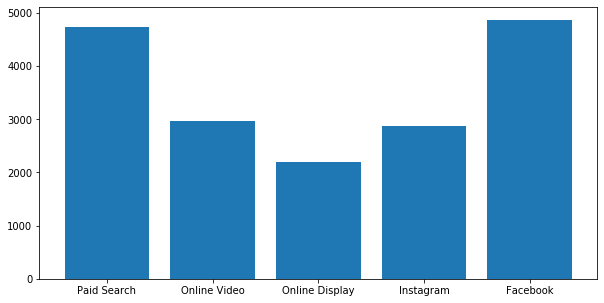

In [77]:
# Total Conversion attribution
channel_removal['conversion'] = df_paths['conversion'].sum()*channel_removal['attribution']
channel_removal['conversion'] = channel_removal['conversion'].round()
plt.figure(figsize=(10,5))
plt.bar(channel_removal['channel'],channel_removal['conversion'])